In [20]:
%load_ext autoreload
%autoreload 2

# %matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import narrom


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from scipy.integrate import solve_ivp as scpy_solve_ivp

N = 80  # Number of variables
F = 3.5  # Forcing

def L96(t,x):
    d = np.zeros(N)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d

x0 = F * np.ones(N)  # Initial state (equilibrium)
# x0[0] += 0.01  # Add small perturbation to the first variable

x0 = F*1.5 * np.sin(np.linspace(0,4*np.pi,N))


t = np.linspace(0.0, 1000.0, 10000)
sol = scpy_solve_ivp(L96, [t[0],t[-1]], x0, t_eval=t)




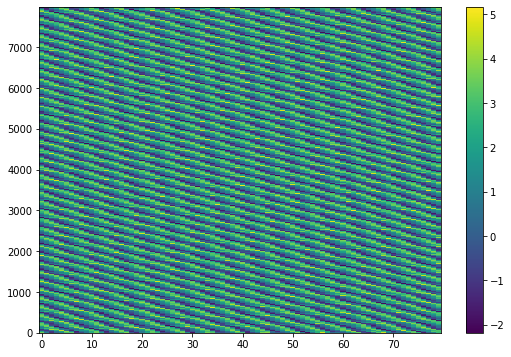

In [10]:
data_matrix = sol.y[:,2000:].T

plt.imshow(data_matrix, aspect='auto', interpolation='none',origin='lower')
plt.colorbar()
plt.show()

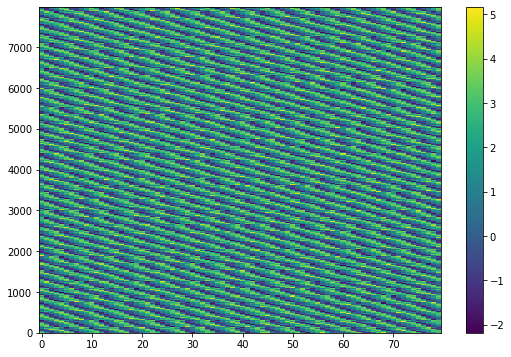

In [76]:
test_data = data_matrix.copy()

n_roll = 9

n = 0
for k in range(test_data.shape[0]):
    if n == n_roll-1:
        test_data[k] = np.roll(test_data[k], shift=1)
    n = (n+1)%n_roll
    
plt.imshow(test_data, aspect='auto', interpolation='none',origin='lower')
plt.colorbar()
plt.show()

In [73]:


dim_reducer = narrom.dim_reducer.SVD()
# dim_reducer = narrom.dim_reducer.FFT(sorted=True)

model = narrom.utils.reducer_helper_class([test_data], dim_reducer)
model.train()



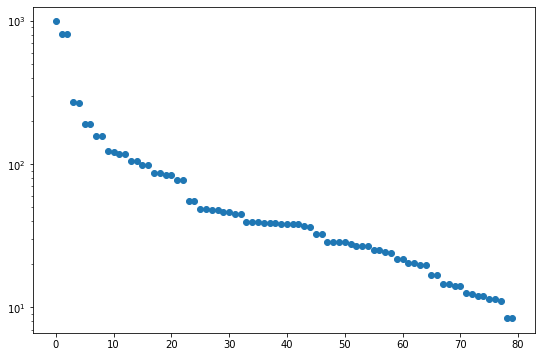

In [74]:
plt.semilogy(dim_reducer.S, 'o')
plt.show()

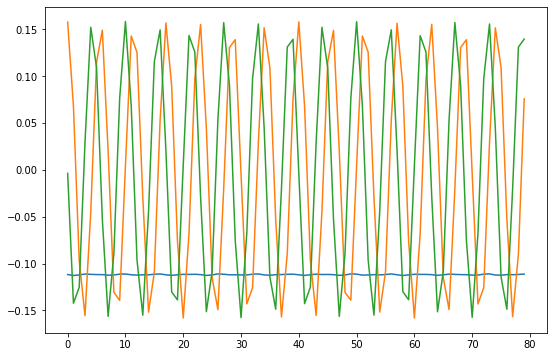

In [75]:
rmax = 3
for k in range(rmax):
    plt.plot(dim_reducer.U[:,k])
plt.show()

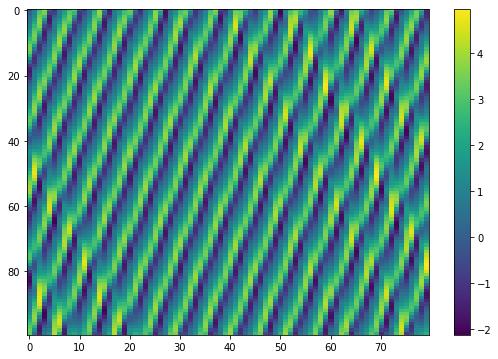

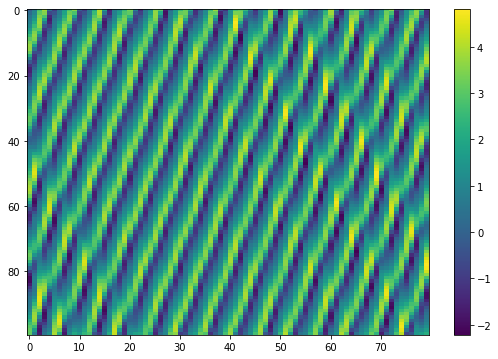

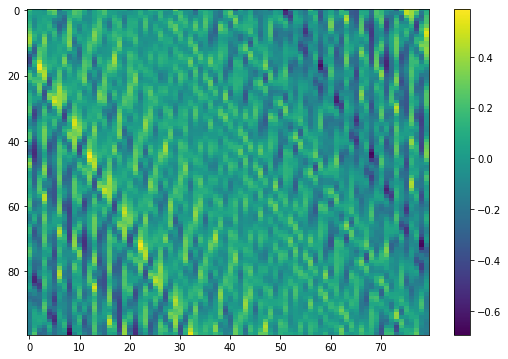

In [30]:
dim_reducer = narrom.dim_reducer.SVD()
# dim_reducer = narrom.dim_reducer.DFT(sorted=True)

model = narrom.utils.reducer_helper_class([data_matrix], dim_reducer)
model.train()


test = data_matrix[:100]

recon = model.approx_single_run(test, rdim = 40)


plt.imshow(test, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(recon-test, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()